In [1]:
#Importing packages primarily for plotting, because the first step of any low-dimensional problem should be
#just looking at it
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

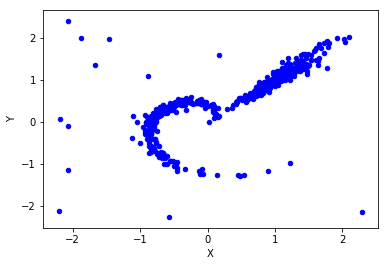

In [2]:
#reading in the csv
df = pd.read_csv('testData.csv',header=None)
#renaming columns out of an excess of care
df = df.rename(columns={0: "X",1: "Y"})
df.plot(kind='scatter',x="X",y="Y",color='blue')
plt.show()

In [4]:
#finding the associated distance from the mean and using it to compute the Median Absolute Deviation of the data set.
df['X_dist'] = abs(df['X'] - df['X'].mean())
df['Y_dist'] = abs(df['Y'] - df['Y'].mean())
MAD = np.sqrt(df['X_dist'].median()**2 + df['Y_dist'].median()**2)

In [8]:
#The usual criteria for outliers in one dimensional data is if X > Mean(X) +/- 2.5* MAD, I adapted that formula
#Subbing in the Euclidean distance
df['Maha_dist'] = np.sqrt((df['X']-df['X_dist'].mean())**2 + (df['Y']-df['Y_dist'].mean())**2)
df ['Outlier'] = df['Maha_dist'] > 2.5 *MAD
df['Outlier'] = df['Outlier'].astype(int)
df_outlier = df[df['Outlier']==1]

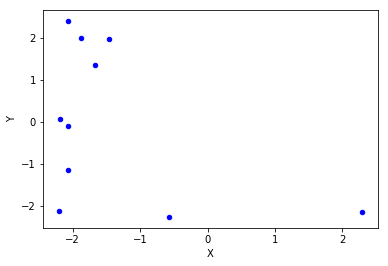

In [9]:
df_outlier.plot(kind='scatter',x="X",y="Y",color='blue')
plt.show()

In [122]:
df = df.drop(['X_dist','Y_dist','Maha_dist'],axis=1)

In [124]:
#exporting the final file
df.to_csv('testData_outliers.csv')

In [ ]:
#The one-cell executable is down here
import pandas as pd
import numpy as np
df = pd.read_csv('testData.csv',header=None)
df = df.rename(columns={0: "X",1: "Y"})
df['X_dist'] = abs(df['X'] - df['X'].mean())
df['Y_dist'] = abs(df['Y'] - df['Y'].mean())
MAD = np.sqrt(df['X_dist'].median()**2 + df['Y_dist'].median()**2)
df['Maha_dist'] = np.sqrt((df['X']-df['X_dist'].mean())**2 + (df['Y']-df['Y_dist'].mean())**2)
df ['Outlier'] = df['Maha_dist'] > 2.5 *MAD
df['Outlier'] = df['Outlier'].astype(int)
df_outlier = df[df['Outlier']==1]
df = df.drop(['X_dist','Y_dist','Maha_dist'],axis=1)
df.to_csv('testData_outliers.csv')